In [304]:
import sys
!{sys.executable} -m pip install pandas

You should consider upgrading via the '/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/bin/python -m pip install --upgrade pip' command.


In [305]:
import pandas as pd
import math


In [306]:
df1 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehact_2014.csv")
df1

,tucaseid,tuactivity_n,eueatsum,euedur,euedur24
0,20140101140007,1,-1,-1,-1
1,20140101140007,2,-1,-1,-1
2,20140101140007,3,-1,-1,-1
3,20140101140007,4,-1,-1,-1
4,20140101140007,5,-1,-1,-1
...,...,...,...,...,...
120714,20141212142500,14,-1,-1,-1
120715,20141212142500,15,-1,-1,-1
120716,20141212142500,16,-1,-1,-1
120717,20141212142500,17,1,60,60


In [307]:
df2 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehresp_2014.csv")
df2

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207,20141212142472,1,1,27.400000,3,1,-1,45,0,0,...,1,2,1,1,1,2,2,180,-1,0
11208,20141212142476,1,2,24.000000,3,5,5,30,0,0,...,1,2,3,2,1,2,2,140,2,0
11209,20141212142480,1,1,22.200001,3,1,5,90,5,0,...,1,2,1,-1,3,3,2,142,-1,0
11210,20141212142484,1,2,23.400000,3,5,-1,240,0,0,...,-1,-1,2,1,-1,-1,-1,168,2,0


In [308]:
df3 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehwgts_2014.csv")
df3

,tucaseid,eufinlwgt001,eufinlwgt002,eufinlwgt003,eufinlwgt004,eufinlwgt005,eufinlwgt006,eufinlwgt007,eufinlwgt008,eufinlwgt009,...,eufinlwgt151,eufinlwgt152,eufinlwgt153,eufinlwgt154,eufinlwgt155,eufinlwgt156,eufinlwgt157,eufinlwgt158,eufinlwgt159,eufinlwgt160
0,20140101140007,5372384.0,4547057.0,9104005.0,4748467.0,5733486.0,4146183.0,1664931.0,1384541.0,9620782.0,...,6036034.0,8784856.0,1912823.0,5271794.0,1529660.0,5017687.0,4975427.0,4972301.0,1481319.0,4729550.0
1,20140101140011,27100000.0,35400000.0,49800000.0,56200000.0,50000000.0,12600000.0,24300000.0,27600000.0,43000000.0,...,26500000.0,23000000.0,9509532.0,23400000.0,42800000.0,8893482.0,37200000.0,31600000.0,29500000.0,9530296.0
2,20140101140028,24400000.0,26800000.0,14200000.0,42400000.0,36300000.0,34100000.0,32800000.0,6966086.0,29500000.0,...,33600000.0,36000000.0,25100000.0,35500000.0,37700000.0,27300000.0,26100000.0,46100000.0,11100000.0,23800000.0
3,20140101140063,3268345.0,1379962.0,3984481.0,2504467.0,3428945.0,4488051.0,746629.9,5587482.0,806942.9,...,2883778.0,1950272.0,2303951.0,3409027.0,2453709.0,629713.2,4809095.0,2103491.0,935877.2,3043285.0
4,20140101140168,34100000.0,25300000.0,5319927.0,6540043.0,4303210.0,18400000.0,23600000.0,14800000.0,25400000.0,...,21400000.0,30500000.0,32800000.0,19400000.0,6974526.0,9683304.0,27300000.0,4822558.0,11600000.0,24400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207,20141212142472,10200000.0,12500000.0,10400000.0,3432683.0,23100000.0,19800000.0,3201699.0,3243684.0,10900000.0,...,8229393.0,9026002.0,3087120.0,11200000.0,2879247.0,10800000.0,3549734.0,10200000.0,10400000.0,19100000.0
11208,20141212142476,12900000.0,19700000.0,10200000.0,20700000.0,15400000.0,11800000.0,4064314.0,12500000.0,4228721.0,...,18300000.0,11800000.0,11800000.0,3891293.0,12700000.0,12300000.0,3782958.0,19900000.0,19900000.0,3731321.0
11209,20141212142480,8399942.0,8327310.0,2501092.0,7398362.0,2436886.0,7357522.0,8740817.0,13400000.0,7800595.0,...,7779518.0,8243967.0,7736875.0,8218309.0,8513533.0,1907825.0,7223177.0,12800000.0,2085640.0,8749762.0
11210,20141212142484,11700000.0,12900000.0,19700000.0,4205657.0,11300000.0,18400000.0,14500000.0,13600000.0,12300000.0,...,23200000.0,21100000.0,3158097.0,17500000.0,11200000.0,12500000.0,3195689.0,3205338.0,3641588.0,11100000.0


In [309]:
df = df2[["erbmi", "euhgt", "euwgt"]]
df

,erbmi,euhgt,euwgt
0,33.200001,60,170
1,22.700001,63,128
2,49.400002,62,270
3,-1.000000,64,-2
4,31.000000,69,210
...,...,...,...
11207,27.400000,68,180
11208,24.000000,64,140
11209,22.200001,67,142
11210,23.400000,71,168


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   11212 non-null  float64
 1   euhgt   11212 non-null  int64  
 2   euwgt   11212 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 262.9 KB


In [311]:
df.describe()

,erbmi,euhgt,euwgt
count,11212.000000,11212.000000,11212.000000
mean,26.291250,65.628255,168.182572
std,8.737788,9.144713,56.893436
min,-1.000000,-3.000000,-5.000000
25%,23.000000,63.000000,140.000000
50%,26.500000,66.000000,168.000000
75%,30.400000,70.000000,200.000000
max,73.599998,77.000000,340.000000


In [312]:
df = df.drop_duplicates()

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 0 to 11206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   2073 non-null   float64
 1   euhgt   2073 non-null   int64  
 2   euwgt   2073 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 64.8 KB


In [314]:
df = df[(df.euhgt > 21) & (df.euwgt > 5)]
df

,erbmi,euhgt,euwgt
0,33.200001,60,170
1,22.700001,63,128
2,49.400002,62,270
4,31.000000,69,210
5,30.700001,71,220
...,...,...,...
11143,21.400000,68,141
11181,50.200001,69,340
11192,22.799999,73,173
11203,35.700001,69,242


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 11206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   1978 non-null   float64
 1   euhgt   1978 non-null   int64  
 2   euwgt   1978 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 61.8 KB


In [316]:
df.isna().value_counts()

erbmi  euhgt  euwgt
False  False  False    1978
Name: count, dtype: int64

In [317]:
# # Impute missing values for numerical columns with the mean
# df['euhgt'].fillna(df['euhgt'].mean(), inplace=True)
# df['euwgt'].fillna(df['euwgt'].mean(), inplace=True)

In [318]:
df = df.dropna(thresh=len(df.columns) // 2)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 11206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   1978 non-null   float64
 1   euhgt   1978 non-null   int64  
 2   euwgt   1978 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 61.8 KB


In [320]:
def convert_to_inches(feet):
    return feet * 12

def convert_to_pounds(kg):
    return kg * 2.20462

# Example conversion
# df['height_inches'] = df['euhgt'].apply(lambda x: convert_to_inches(x))
# df['weight_pounds'] = df['euwgt'].apply(lambda x: convert_to_pounds(x))


In [321]:
df.describe()

,erbmi,euhgt,euwgt
count,1978.000000,1978.000000,1978.000000
mean,29.941557,66.616785,189.048534
std,8.550389,5.043539,56.753615
min,13.000000,56.000000,98.000000
25%,23.600000,63.000000,145.000000
50%,28.600000,67.000000,181.000000
75%,34.700001,71.000000,225.000000
max,73.599998,77.000000,340.000000


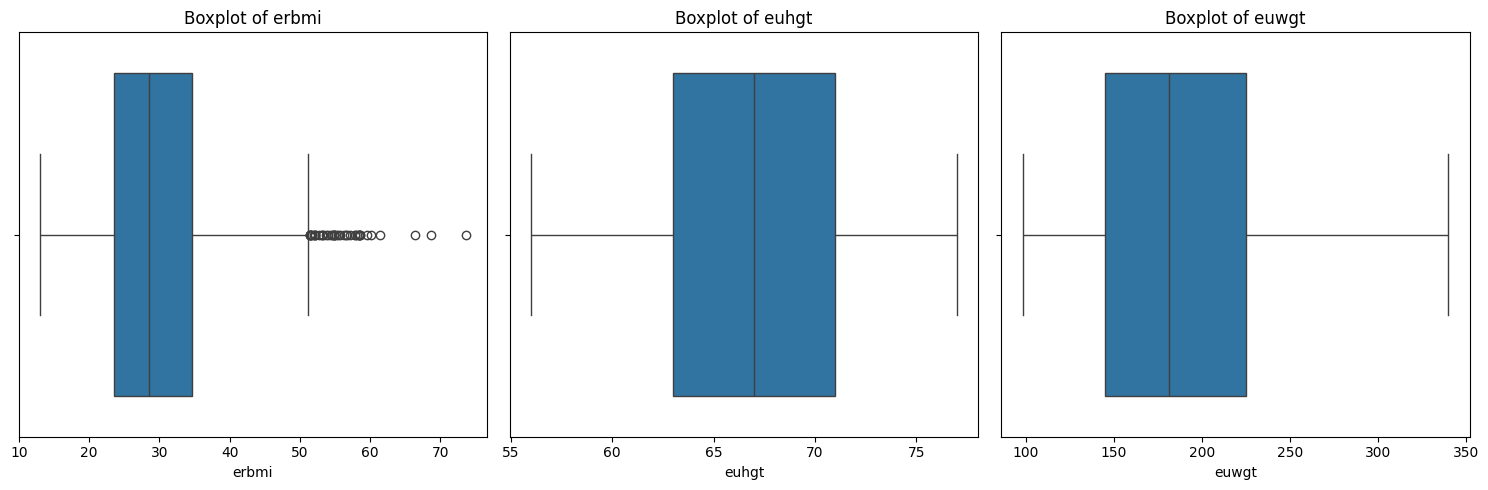

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# List of columns to check for outliers
columns = ['erbmi', 'euhgt', 'euwgt']

# Create a figure and axis for each boxplot
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [323]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/bin/python -m pip install --upgrade pip' command.


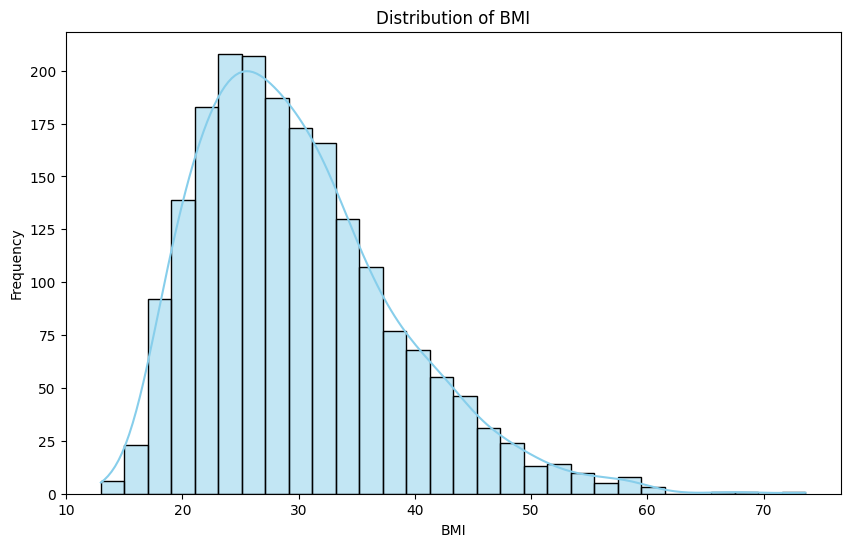

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['erbmi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig("Distribution of BMI") 
plt.show()



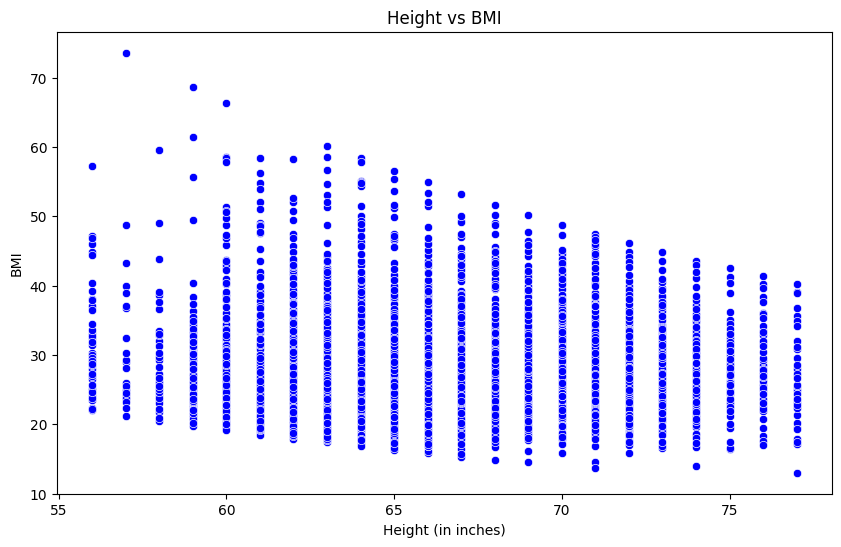

In [325]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='euhgt', y='erbmi', data=df, color='blue')
plt.title('Height vs BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('BMI')
plt.savefig("Height vs BMI") 
plt.show()



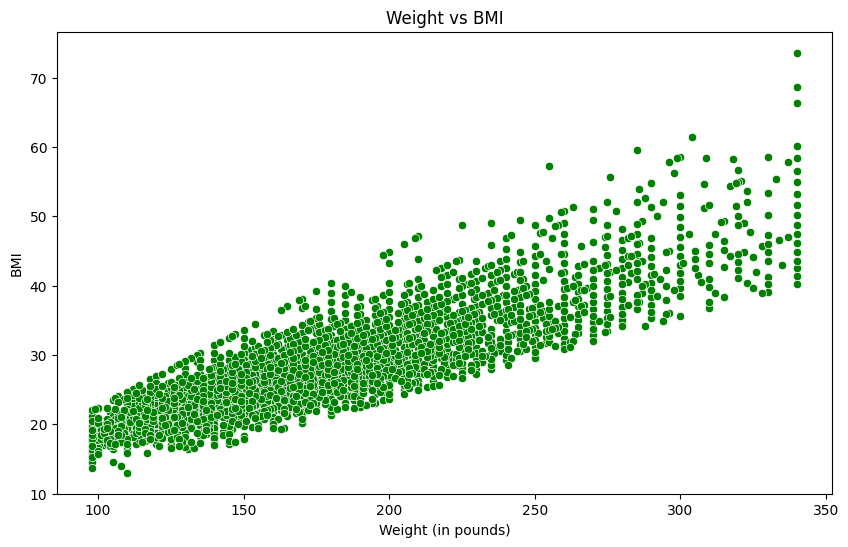

In [326]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='euwgt', y='erbmi', data=df, color='green')
plt.title('Weight vs BMI')
plt.xlabel('Weight (in pounds)')
plt.ylabel('BMI')
plt.savefig("Weight vs BMI") 
plt.show()




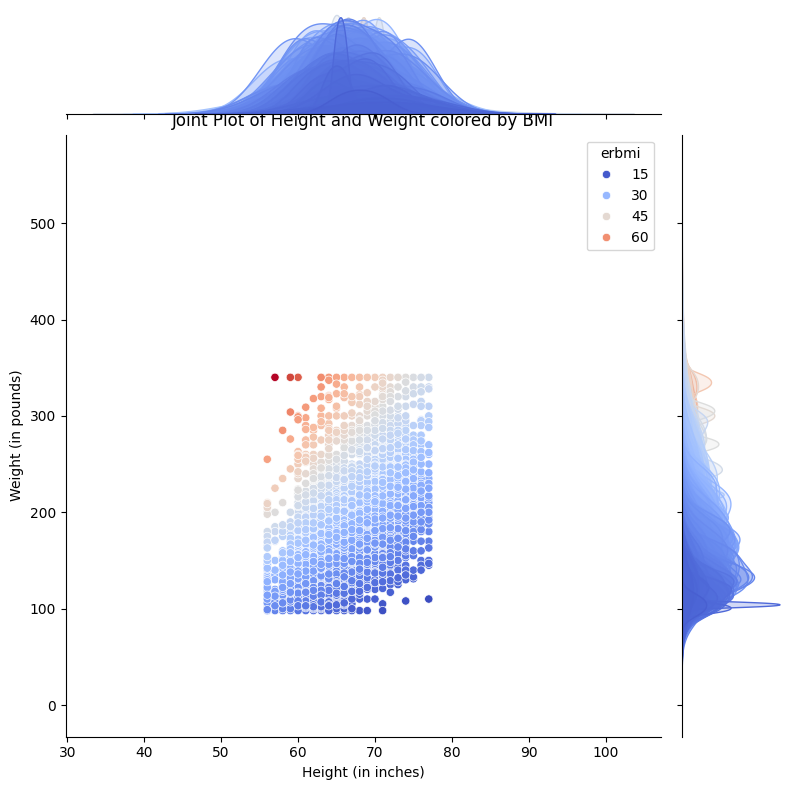

In [327]:
sns.jointplot(x='euhgt', y='euwgt', data=df, kind='scatter', hue='erbmi', palette='coolwarm', height=8)
plt.title('Joint Plot of Height and Weight colored by BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.savefig("Joint Plot of Height and Weight colored by BMI") 
plt.show()



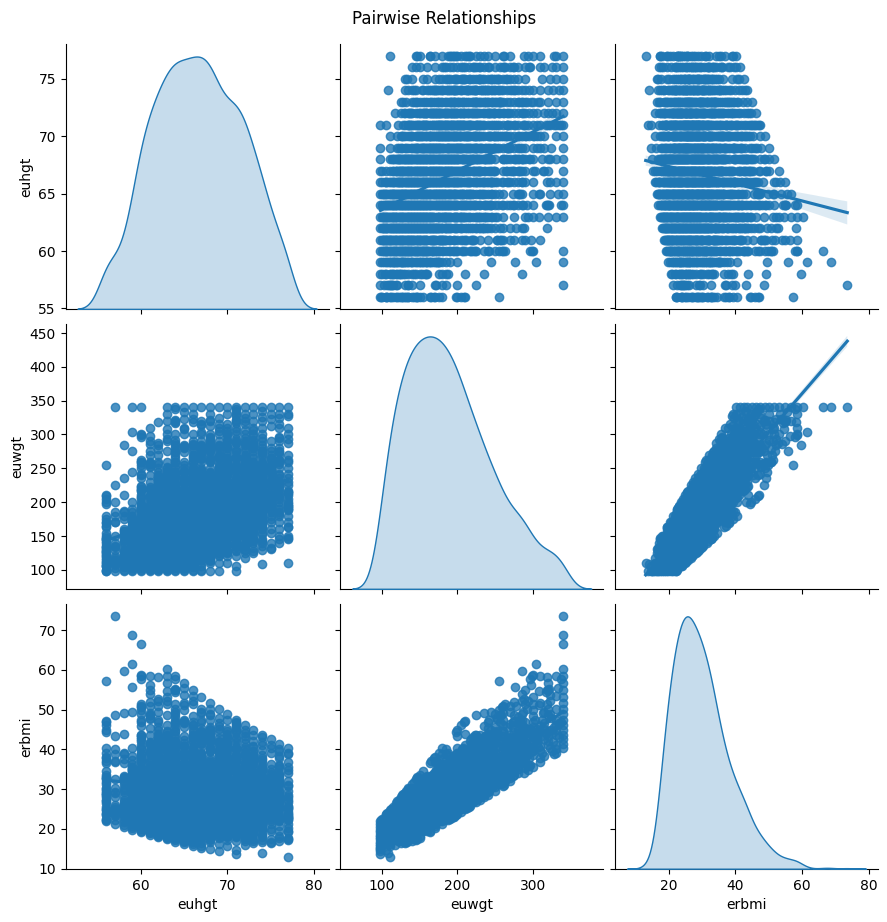

In [328]:
sns.pairplot(df[['euhgt', 'euwgt', 'erbmi']], kind='reg', diag_kind='kde', height=3)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.savefig("Pairwise Relationships") 
plt.show()


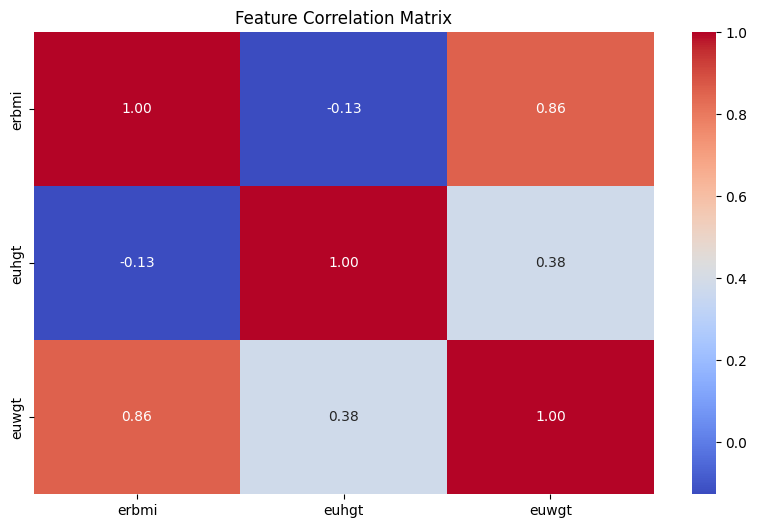

In [329]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig("Feature Correlation Matrix") 
plt.show()



In [330]:

!{sys.executable} -m pip install scikit-learn

You should consider upgrading via the '/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/bin/python -m pip install --upgrade pip' command.


In [331]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np


# Handle missing and invalid values
df = df[(df['euhgt'] > 0) & (df['euwgt'] > 0)]

# Features and target
X = df[['euhgt', 'euwgt']]
y = df['erbmi']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print the results
for name, mse in results.items():
    print(f"{name}: MSE = {mse}")

# Find the best model based on MSE
best_model_name = min(results, key=results.get)
print(f"Best model: {best_model_name} with MSE = {results[best_model_name]}")


Linear Regression: MSE = 1.7411908393039097
Ridge Regression: MSE = 1.7412004032273005
Lasso Regression: MSE = 1.812453111894282
Decision Tree: MSE = 0.5851009994971439
Random Forest: MSE = 0.3433581254591141
Support Vector Machine: MSE = 4.69512808403115
Gradient Boosting: MSE = 0.1868293078085788
Best model: Gradient Boosting with MSE = 0.1868293078085788


In [333]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Train and evaluate each model using R², MAE, and RMSE

regression_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results
    regression_results[name] = {
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse
    }

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(regression_results).T

# Display the results
print(results_df)

                              R²       MAE      RMSE
Linear Regression       0.976326  0.847728  1.319542
Ridge Regression        0.976326  0.847713  1.319546
Lasso Regression        0.975357  0.832448  1.346274
Decision Tree           0.992216  0.429798  0.756621
Random Forest           0.994635  0.224768  0.628138
Support Vector Machine  0.936164  1.067960  2.166824
Gradient Boosting       0.997460  0.314084  0.432238


Predicted BMI for height 170 cm and weight 70 kg: 24.221453287197235


/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear Regression: MSE = 0.261552768482526
Ridge Regression: MSE = 0.2615531113091853
Lasso Regression: MSE = 0.3216089385741082
Decision Tree: MSE = 0.11868686868686869
Random Forest: MSE = 0.060443686868686876
Support Vector Machine: MSE = 0.10141120573274104
Gradient Boosting: MSE = 0.0859552435804839

Linear Regression Classification Metrics:
Accuracy: 0.69
Precision: 0.83
Recall: 0.69
F1-Score: 0.69

Ridge Regression Classification Metrics:
Accuracy: 0.69
Precision: 0.83
Recall: 0.69
F1-Score: 0.69

Lasso Regression Classification Metrics:
Accuracy: 0.64
Precision: 0.75
Recall: 0.64
F1-Score: 0.63

Decision Tree Classification Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Random Forest Classification Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Support Vector Machine Classification Metrics:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-Score: 0.90

Gradient Boosting Classification Metrics:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
